In [1]:
import numpy as np
import xarray as xr
import pickle
import pandas as pd
import time
import os

import datetime
from sys import getsizeof,path


import matplotlib.pyplot as plt
import matplotlib

import theano
import theano.tensor as tt
import pymc3 as pm
theano.config.optimizer="fast_run"

In [34]:
deaths = pd.read_csv("../../Data/Deaths/DeathsRKI_fromArcgis.csv")

for t in ["TodesMeldedatum","Meldedatum","Refdatum"]:
    deaths[t] = pd.to_datetime(deaths[t])
    

In [35]:
deaths = deaths[deaths["nTotd"].notna() == True]

deaths = deaths[deaths["nTotd"] > 85]
print(deaths)

           FID  IdLandkreis Geschlecht Altersgruppe  AnzahlFall  \
56        1901         3102          W         A80+           1   
57        2399         5754          M      A60-A79           1   
58        2803         5911          M      A60-A79           1   
59        4376         5978          M         A80+           1   
60        4476         6412          W      A35-A59           1   
...        ...          ...        ...          ...         ...   
89625  1909101        14628          W         A80+           1   
89626  1960921        15084          M      A60-A79           1   
89627  1973494        15087          M         A80+           1   
89628  2026484        16065          M         A80+           1   
89629  2076076        16077          M         A80+           1   

       AnzahlTodesfall  NeuerFall  NeuerTodesfall Meldedatum  nTotd  \
56                   1          1               1 2020-03-26     86   
57                   1          1               1 202

In [44]:
deaths_erkb = deaths[deaths["IstErkrankungsbeginn"] == 1.0]
derk = deaths_erkb["nTotd"]-deaths_erkb["nMeld"]
dmeld = deaths["nTotd"]-deaths["nMeld"]

(array([2863., 4061., 4729., 4655., 3497., 3040., 2122., 1701., 1378.,
        1016.,  834.,  548.,  529.,  433.,  304.,  287.,  239.,  186.,
         155.,  166.,  115.,  103.,   90.,   70.,   83.,   55.,   66.,
          40.,   48.,   50.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120.]),
 <BarContainer object of 30 artists>)

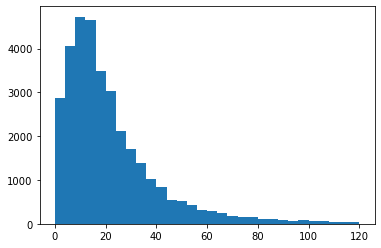

In [56]:
plt.hist(derk[derk <= 120],bins=30)

#for i,row in enumerate(deaths.iterrows()):
 #   print(i,row[1])

(array([ 9603., 11360., 12705., 12409.,  8940.,  7592.,  5271.,  4066.,
         3173.,  2323.,  1978.,  1366.,  1252.,   962.,   748.,   654.,
          516.,   443.,   362.,   410.,   309.,   247.,   219.,   178.,
          196.,   139.,   153.,   102.,   108.,   126.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120.]),
 <BarContainer object of 30 artists>)

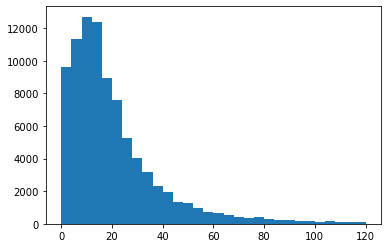

In [55]:
plt.hist(dmeld[dmeld <= 120],bins=30)

In [57]:
for mi in range(4,12+6):
    m1,y1 = mi%12,mi//12+2020
    m2,y2 = (mi+1)%12,(mi+1)//12+2020
    print(m1,m2,y1,y2)

4 5 2020 2020
5 6 2020 2020
6 7 2020 2020
7 8 2020 2020
8 9 2020 2020
9 10 2020 2020
10 11 2020 2020
11 0 2020 2021
0 1 2021 2021
1 2 2021 2021
2 3 2021 2021
3 4 2021 2021
4 5 2021 2021
5 6 2021 2021


In [10]:

bonn = deaths[deaths["IdLandkreis"] == 5314]
bonn2021 = bonn[bonn["TodesMeldedatum"] > datetime.datetime(2021,1,1)]

print(bonn2021["NeuerTodesfall"].sum())

132
